# Title: Predicting Cricket Match Winner with Amazon Bedrock - Anthropic Claude 3 Sonnet Model

## Context:

### The 5th Test match held in Dharamsala from March 07 - 09, 2024, as part of the England tour of India, stands as a testament to the intensity and excitement that cricket brings. 
### I this blog/notebook I am using AWS Bedrock New announcements Amazon Claude 3.0 Sonnet Model  to analyze match statistics image and even predict who will be winner.

## Key Features I noticed during this Exercise:

### Image Recognition: The model employs state-of-the-art image recognition algorithms to accurately identify and extract relevant cricket match statistics from image files.
### Statistical Analysis: With a deep understanding of cricketing metrics and game dynamics, the model analyzes extracted data to discern patterns, trends, and performance indicators.
### Predictive Analytics: By synthesizing extracted statistics and historical trends, the model generates predictive insights to forecast the likely outcome of the cricket match.
### Data Extraction: The Amazon Claude Sonnet Model ingests image files containing cricket match statistics, leveraging its image recognition capabilities to extract relevant.

In [1]:
! python --version

Python 3.11.5


# Environment Setup

## Upgrade pip

In [2]:
! pip install --upgrade pip

# Install latest boto3,awscli, boto3-core

In [3]:
! pip install --no-build-isolation --force-reinstall \
    "boto3>=1.33.6" \
    "awscli>=1.31.6" \
    "botocore>=1.33.6"

  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached docutils-0.16-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl.metadata (14 kB)
  Using cached rsa-4.7.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 12.3 MB/s eta 0:00:0000:0100:01
Using cached colorama-0.4.4-py2.py3-none-any.whl

# Load the Library

In [4]:
import json
import os
import sys

import boto3
import botocore

bedrock = boto3.client(service_name="bedrock")
bedrock_runtime = boto3.client(service_name="bedrock-runtime")

### Anthropic is the AI safety and research company behind Claude - the frontier model used by millions of businesses and consumers for its emphasis on safety and performance.

### You can read more about more on Claude 3 Sonnet - https://www.dataopslabs.com/claude-3-sonnet-and-aws-bedrock-integration

# Prompt
## Your task is to create a comprehensive Cricket Match Stats Analysis & Outcome Prediction, Extract stats from uploaded images, including player performances and match conditions. Use predictive modeling to forecast match outcomes based on provide data

In [5]:
# Define the prompt text to ask the model about the content of the uploaded image
input_text = "Your task is to create a comprehensive Cricket Match Stats Analysis & Outcome Prediction, Extract stats from uploaded images, including player performances and match conditions. Use predictive modeling to forecast match outcomes based on provide data"

In [20]:
# Configure Model Configuration: Specify the model ID, Anthropic version, and maximum tokens for text completion
model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'
max_tokens = 256

# This provide comparision to both the players

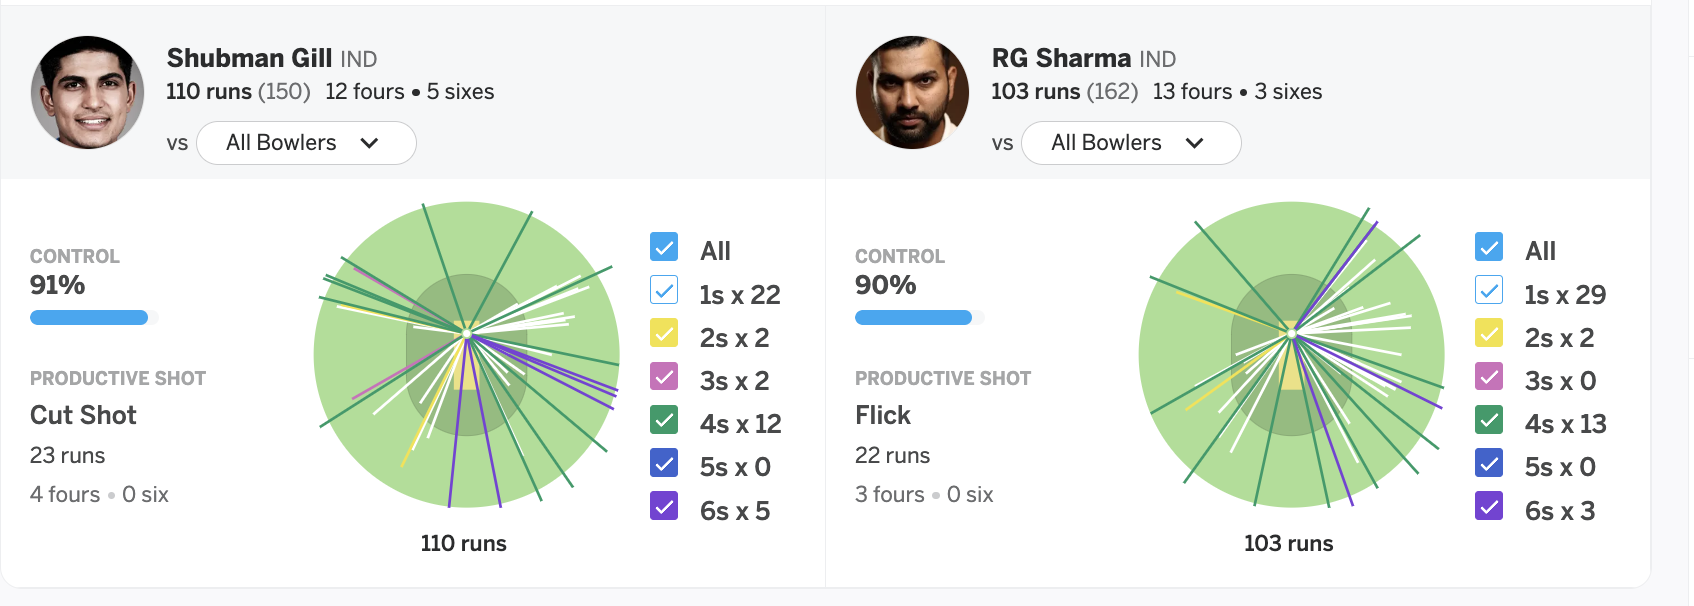

In [26]:
from PIL import Image
from IPython.display import display

# Open the image
img = Image.open('stats_images/Star-batting-performance.png')

# Convert the image to RGB mode
img = img.convert('RGB')

# Display the image
display(img)

In [21]:
# Parse the Image: Read the image file and encode it into base64 format
import base64
input_image = "stats_images/Star-batting-performance.png"
with open(input_image, "rb") as image_file:
    content_image = base64.b64encode(image_file.read()).decode('utf8')

In [22]:
# Invoke the Model: Construct the API request body including the image data and prompt text, then send a POST request to the model API
message = {"role": "user",
     "content": [
        {"type": "image", "source": {"type": "base64",
            "media_type": "image/png", "data": content_image}},
        {"type": "text", "text": input_text}
        ]}

messages = [message]

In [23]:
def run_multi_modal_prompt(bedrock_runtime, model_id, messages, max_tokens):
    """
    Invokes a model with a multimodal prompt.
    Args:
        bedrock_runtime: The Amazon Bedrock boto3 client.
        model_id (str): The model ID to use.
        messages (JSON) : The messages to send to the model.
        max_tokens (int) : The maximum  number of tokens to generate.
    Returns:
        None.
    """

    body = json.dumps(
        {
            "anthropic_version": "bedrock-2023-05-31",
            "max_tokens": max_tokens,
             "messages": messages
        }
    )

    response = bedrock_runtime.invoke_model(
        body=body, modelId=model_id)
    response_body = json.loads(response.get('body').read())
    results = response_body.get("content")[0].get("text")

    return results

In [24]:
response_claude_sonnet = run_multi_modal_prompt(bedrock_runtime, model_id, messages, max_tokens)
print(json.dumps(response_claude_sonnet, indent=4))

"The image shows detailed batting stats for two cricket players - Shubman Gill and RG Sharma - in what appears to be an innings from a cricket match. The stats are presented in circular charts that break down the runs scored through various shot types and scoring regions.\n\nFor Shubman Gill, the key stats shown are:\n- Total runs scored: 110 (off 150 balls)\n- Fours hit: 12\n- Sixes hit: 5\n- His most productive shot was the cut shot, scoring 23 runs including 4 fours"


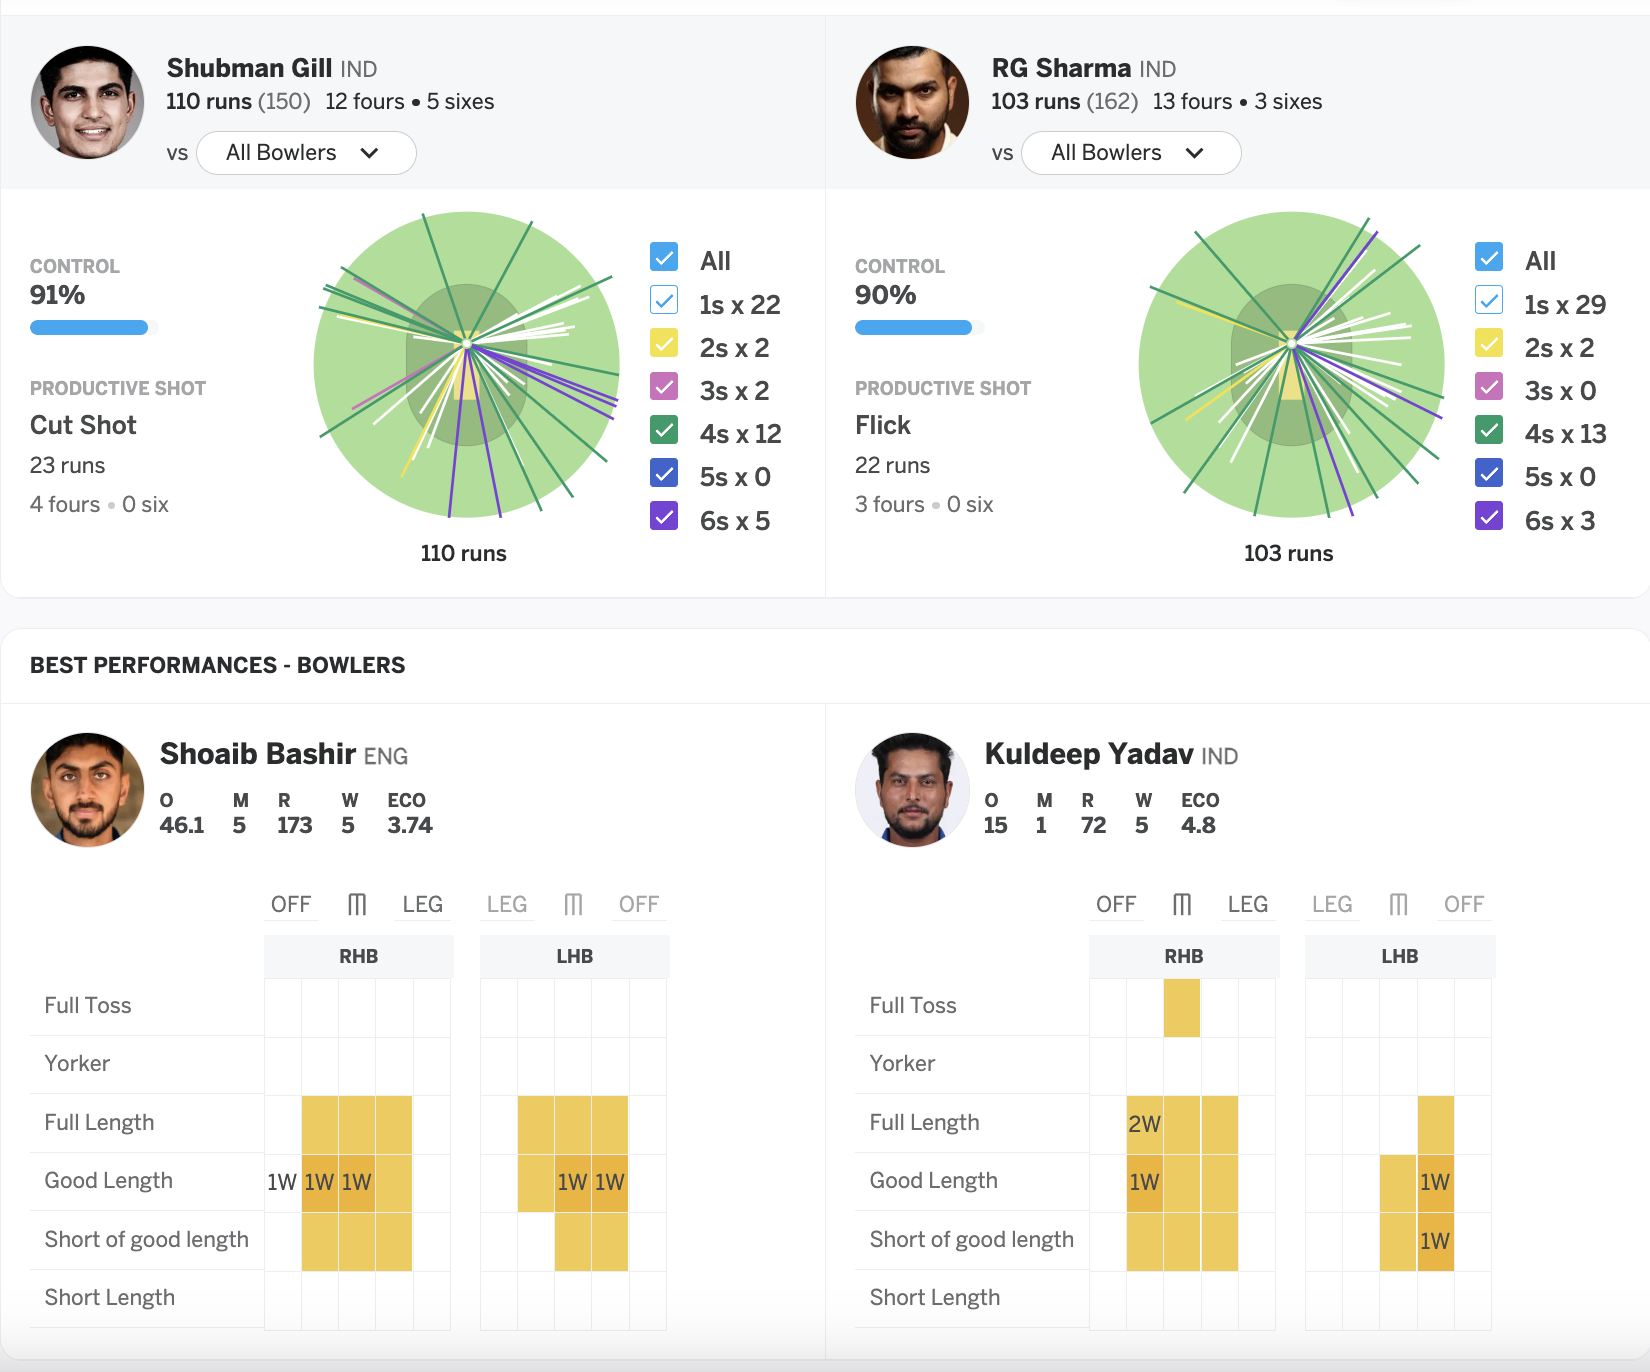

In [29]:
from PIL import Image
from IPython.display import display

# Open the image
img = Image.open('stats_images/Star-Batting-Bowling-Performance.png')

# Convert the image to RGB mode
img = img.convert('RGB')

# Display the image
display(img)

In [30]:
# Parse the Image: Read the image file and encode it into base64 format
import base64
input_image2 = "stats_images/Star-Batting-Bowling-Performance.png"
with open(input_image2, "rb") as image_file:
    content_image = base64.b64encode(image_file.read()).decode('utf8')

In [31]:
# Invoke the Model: Construct the API request body including the image data and prompt text, then send a POST request to the model API
message = {"role": "user",
     "content": [
        {"type": "image", "source": {"type": "base64",
            "media_type": "image/png", "data": content_image}},
        {"type": "text", "text": input_text}
        ]}

messages = [message]

In [32]:
def run_multi_modal_prompt(bedrock_runtime, model_id, messages, max_tokens):
    """
    Invokes a model with a multimodal prompt.
    Args:
        bedrock_runtime: The Amazon Bedrock boto3 client.
        model_id (str): The model ID to use.
        messages (JSON) : The messages to send to the model.
        max_tokens (int) : The maximum  number of tokens to generate.
    Returns:
        None.
    """

    body = json.dumps(
        {
            "anthropic_version": "bedrock-2023-05-31",
            "max_tokens": 256,
             "messages": messages
        }
    )

    response = bedrock_runtime.invoke_model(
        body=body, modelId=model_id)
    response_body = json.loads(response.get('body').read())
    results = response_body.get("content")[0].get("text")

    return results

In [33]:
response_claude_sonnet_2 = run_multi_modal_prompt(bedrock_runtime, model_id, messages, max_tokens)
print(json.dumps(response_claude_sonnet_2, indent=4))

"Based on the image, I can analyze the cricket match statistics and provide insights as follows:\n\nBatting Analysis:\n- Shubman Gill (IND) scored 110 runs off 150 deliveries, including 12 fours and 5 sixes. His most productive shot was the cut shot (23 runs, 4 fours).\n- RG Sharma (IND) scored 103 runs off 162 deliveries, with 13 fours and 3 sixes. His most productive shot was the flick shot (22 runs, 3 fours).\n\nBowling Analysis:\n- Shoaib Bashir (ENG) bowled 5 overs, conceding 46 runs while taking 5 wickets at an economy rate of 3.74. His lengths were mostly good length and full length deliveries.\n- Kuldeep Yadav (IND) bowled 1 over, conceding 15 runs while taking 1 wicket at an economy rate of 4.8. His lengths were mostly short of good length and short length deliveries.\n\nMatch"


## Prompt 

### Your task is to create a comprehensive Cricket Match Stats Analysis and Outcome Prediction based on the image provided, The match is between India vs England 5 Match Test series. Provide player name, country with statistics. Use predictive modeling to forecast match outcomes based on date from only uploaded image. Need the prediction of Match with team or country name on who will win the match based on the data. Give me the output in bullet points. I am giving some stats for this series

In [56]:
match_result_analysis = "Your task is to create a comprehensive Cricket Match Stats Analysis and Outcome Prediction based on the image provided, The match is between India vs England 5 Match Test series. Provide player name, country with statistics. Use predictive modeling to forecast match outcomes based on date from only uploaded image. Need the prediction of Match with team or country name on who will win the match based on the data. Give me the output in bullet points. I am giving some stats for this series"

In [57]:
# Configure Model Configuration: Specify the model ID, Anthropic version, and maximum tokens for text completion
model_id = 'anthropic.claude-3-sonnet-20240229-v1:0'
max_tokens = 512

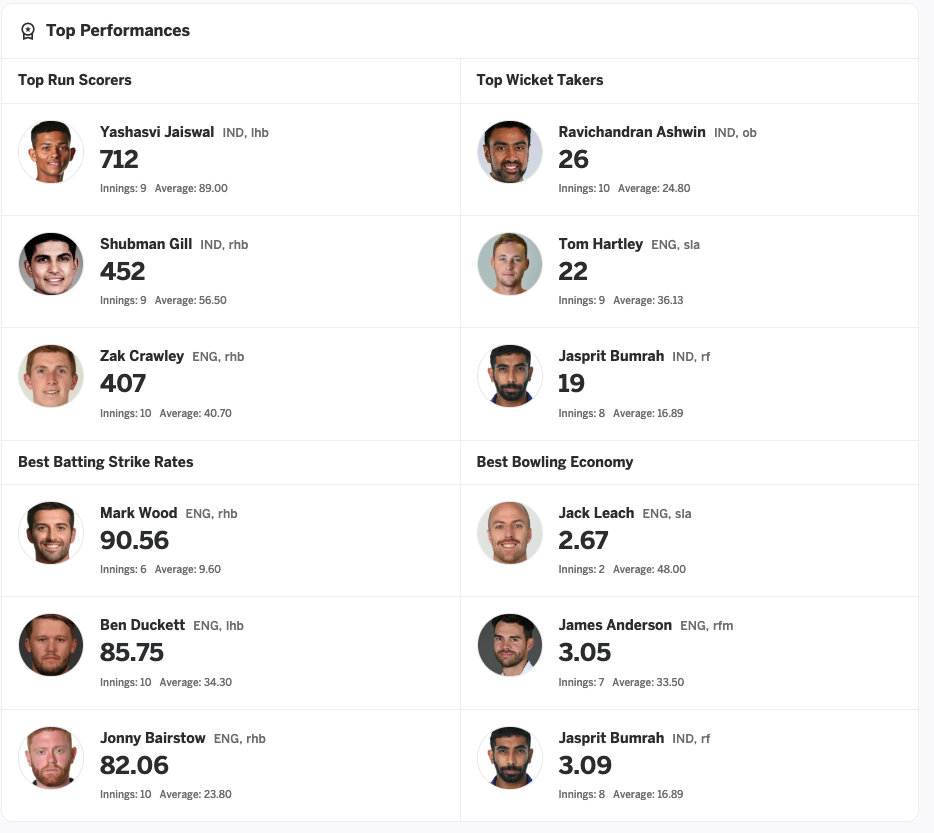

In [58]:
from PIL import Image
from IPython.display import display

# Open the image
img = Image.open('stats_images/PerformanceSeries.png')

# Convert the image to RGB mode
img = img.convert('RGB')

# Display the image
display(img)

In [60]:
# Parse the Image: Read the image file and encode it into base64 format
import base64
input_image3 = "stats_images/PerformanceSeries.png"
with open(input_image3, "rb") as image_file:
    content_image = base64.b64encode(image_file.read()).decode('utf8')

In [61]:
# Invoke the Model: Construct the API request body including the image data and prompt text, then send a POST request to the model API
message = {"role": "user",
     "content": [
        {"type": "image", "source": {"type": "base64",
            "media_type": "image/png", "data": content_image}},
        {"type": "text", "text": match_result_analysis}
        ]}

messages = [message]

In [62]:
def run_multi_modal_prompt_analysis(bedrock_runtime, model_id, messages, max_tokens):
    """
    Invokes a model with a multimodal prompt.
    Args:
        bedrock_runtime: The Amazon Bedrock boto3 client.
        model_id (str): The model ID to use.
        messages (JSON) : The messages to send to the model.
        max_tokens (int) : The maximum  number of tokens to generate.
    Returns:
        None.
    """

    body = json.dumps(
        {
            "anthropic_version": "bedrock-2023-05-31",
            "max_tokens": max_tokens,
             "messages": messages
        }
    )

    response = bedrock_runtime.invoke_model(
        body=body, modelId=model_id)
    response_body = json.loads(response.get('body').read())
    results = response_body.get("content")[0].get("text")

    return results

In [63]:
response_claude_sonnet = run_multi_modal_prompt_analysis(bedrock_runtime, model_id, messages, max_tokens)
print(json.dumps(response_claude_sonnet, indent=4))

"Based on the statistics provided in the image, here is a comprehensive Cricket Match Stats Analysis and Outcome Prediction for the India vs England 5 Match Test series:\n\nTop Run Scorers:\n\u2022 Yashasvi Jaiswal (IND) - 712 runs in 9 innings with an average of 89.00\n\u2022 Shubman Gill (IND) - 452 runs in 9 innings with an average of 56.50\n\u2022 Zak Crawley (ENG) - 407 runs in 10 innings with an average of 40.70\n\nTop Wicket Takers:\n\u2022 Ravichandran Ashwin (IND) - 26 wickets in 10 innings with an average of 24.80\n\u2022 Tom Hartley (ENG) - 22 wickets in 9 innings with an average of 36.13\n\u2022 Jasprit Bumrah (IND) - 19 wickets in 8 innings with an average of 16.89\n\nBest Batting Strike Rates:\n\u2022 Mark Wood (ENG) - 90.56 in 6 innings with an average of 9.60\n\u2022 Ben Duckett (ENG) - 85.75 in 10 innings with an average of 34.30\n\u2022 Jonny Bairstow (ENG) - 82.06 in 10 innings with an average of 23.80\n\nBest Bowling Economy:\n\u2022 Jack Leach (ENG) - 2.67 in 2 inn